## Credit Card Fraud Detection

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking Missing Values

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['Amount'] = ss.fit_transform(pd.DataFrame(df['Amount']))

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Drop the table

In [7]:
df = df.drop(['Time'] , axis = 1)

In [8]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [9]:
df.shape

(284807, 30)

In [10]:
df.duplicated().any()

True

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(275663, 30)

In [13]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [14]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

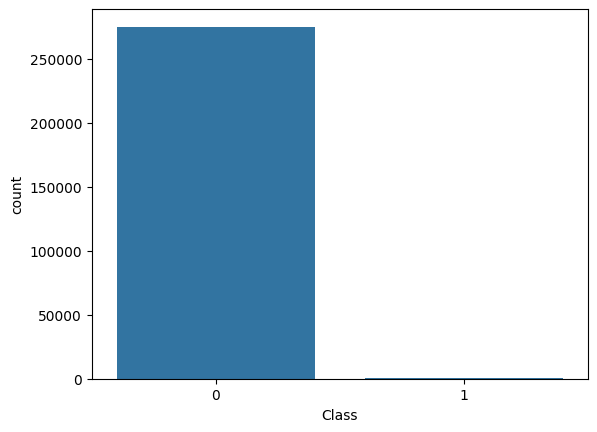

In [15]:
import seaborn as sns

# Assuming df is already defined
class_counts = df['Class'].value_counts()
sns.countplot(x='Class', data=df, order=class_counts.index)


### Defining X and Y

In [16]:
X = df.drop('Class', axis=1)
Y = df['Class']

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=21)

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [19]:
Y_pred1 = log.predict(X_test)

In [20]:
from sklearn .metrics import accuracy_score

In [21]:
accuracy_score(Y_test,Y_pred1)

0.9992563437505668

In [22]:
from sklearn.metrics import precision_score , recall_score , f1_score

In [23]:
precision_score(Y_test , Y_pred1)

0.8524590163934426

In [24]:
f1_score(Y_test , Y_pred1)

0.7172413793103448

### UnderSampling

In [25]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]


In [26]:
normal.shape

(275190, 30)

In [27]:
fraud.shape

(473, 30)

In [28]:
 normal_sample = normal.sample(n=473)

In [29]:
normal_sample.shape

(473, 30)

In [30]:
new_df = pd.concat([normal_sample , fraud] , ignore_index = True)

In [31]:
new_df ['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [32]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.752224,-1.127057,-2.959921,-1.747442,2.082846,3.018893,-0.237599,0.663957,0.765396,-0.401057,...,-0.176102,-0.918274,0.229516,0.726992,-0.373947,0.346882,-0.101218,-0.040266,0.371904,0
1,1.152262,0.017556,1.300056,1.337674,-0.922937,-0.188738,-0.511419,0.050158,0.787303,-0.222238,...,-0.054249,0.083280,-0.014223,0.396709,0.438349,-0.410737,0.076963,0.039761,-0.313289,0
2,1.788207,0.758390,-2.324271,4.305826,1.415619,0.312476,0.373217,0.008278,-0.518118,-0.008216,...,-0.118473,-0.226599,-0.158254,-0.167946,0.385880,0.191075,-0.011510,0.025296,-0.011633,0
3,-1.039631,0.627331,-0.072626,-0.269804,0.580823,-0.665513,1.800278,-1.039993,1.733650,0.655326,...,0.046852,1.476233,0.156908,0.077915,-0.855315,-0.435376,-0.882621,-0.501999,0.090158,0
4,-0.445649,0.462053,1.050359,-2.180048,0.231165,-0.758195,0.851403,-0.038639,0.886613,-0.963637,...,0.115612,0.610118,-0.254144,-0.033585,-0.100171,-0.820068,0.237875,-0.031779,-0.349231,0


In [33]:
X = new_df.drop('Class', axis=1)
Y = new_df['Class']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=21)

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train , Y_train) 

LogisticRegression()

In [36]:
Y_pred1 = log.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(Y_test,Y_pred1)

0.9368421052631579

In [39]:
from sklearn.metrics import precision_score , recall_score , f1_score

In [40]:
precision_score(Y_test , Y_pred1)

0.9263157894736842

In [41]:
f1_score(Y_test , Y_pred1)

0.9361702127659575

## Dicision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train , Y_train)

DecisionTreeClassifier()

In [43]:
Y_pred2 = dt.predict(X_test)

In [44]:
accuracy_score(Y_test , Y_pred2)

0.9

In [45]:
precision_score(Y_test , Y_pred2)

0.8627450980392157

In [46]:
recall_score(Y_test , Y_pred2)

0.946236559139785

In [47]:
f1_score(Y_test , Y_pred2)


0.9025641025641026

## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train , Y_train)

RandomForestClassifier()

In [49]:
Y_pred3 = rf.predict(X_test)

In [50]:
accuracy_score(Y_test , Y_pred3)

0.9578947368421052

In [51]:
precision_score(Y_test , Y_pred3)

0.967032967032967

In [52]:
recall_score(Y_test , Y_pred3)

0.946236559139785

In [53]:
f1_score(Y_test , Y_pred3)

0.9565217391304348

In [54]:
final_df = pd.DataFrame({'Models' : ['LR' , 'DT' , 'RF'],
              "ACC":[accuracy_score(Y_test , Y_pred1)*100,
                    accuracy_score(Y_test , Y_pred2)*100,
                    accuracy_score(Y_test , Y_pred3)*100
                         ]})

In [55]:
final_df

,Models,ACC
0,LR,93.684211
1,DT,90.000000
2,RF,95.789474


<Axes: xlabel='Models', ylabel='ACC'>

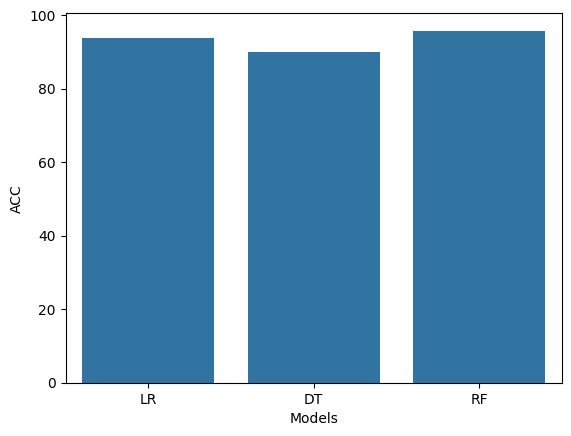

In [56]:
sns.barplot(x=final_df['Models'], y=final_df['ACC'])

## Oversampling

In [57]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [58]:
X.shape

(275663, 29)

In [59]:
Y.shape

(275663,)

In [60]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
X_res , Y_res = SMOTE().fit_resample(X,Y)

In [63]:
Y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res,Y_res,test_size=0.2,random_state=21)

In [65]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [66]:
Y_pred1 = log.predict(X_test)

In [67]:
accuracy_score(Y_test,Y_pred1)

0.9450743122933246

In [68]:
precision_score(Y_test , Y_pred1)

0.9722591458128648

In [69]:
recall_score(Y_test , Y_pred1)

0.9163685882886973

In [70]:
f1_score(Y_test , Y_pred1)

0.9434868765422867

## Decision Tree Classifier

In [71]:
dt = DecisionTreeClassifier()
dt.fit(X_train , Y_train)

DecisionTreeClassifier()

In [72]:
Y_pred2 = dt.predict(X_test)

In [73]:
accuracy_score(Y_test,Y_pred2)

0.9979468730695156

In [74]:
precision_score(Y_test , Y_pred2)

0.9970277470685249

In [75]:
recall_score(Y_test , Y_pred2)

0.9988742623694962

In [76]:
f1_score(Y_test , Y_pred2)

0.9979501505641621

## Random Forest Classifier

In [77]:
Y_pred3 = rf.predict(X_test)

In [78]:
accuracy_score(Y_test , Y_pred1)

0.9450743122933246

In [79]:
precision_score(Y_test,Y_pred1)

0.9722591458128648

In [80]:
recall_score(Y_test , Y_pred1)

0.9163685882886973

In [81]:
f1_score(Y_test,Y_pred1)

0.9434868765422867

In [82]:
final_df = pd.DataFrame({'Models' : ['LR' , 'DT' , 'RF'],
              "ACC":[accuracy_score(Y_test , Y_pred1)*100,
                    accuracy_score(Y_test , Y_pred2)*100,
                    accuracy_score(Y_test , Y_pred3)*100
                         ]})

<Axes: xlabel='Models', ylabel='ACC'>

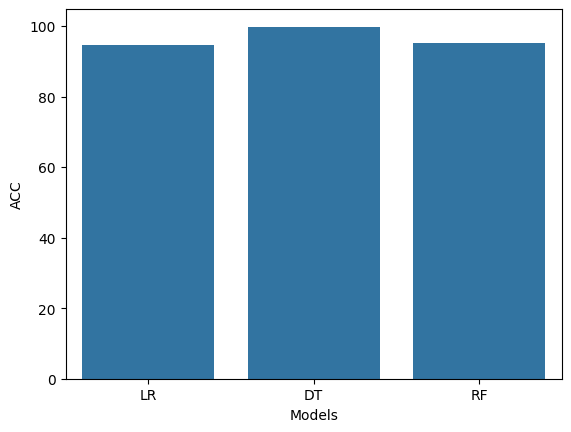

In [83]:
sns.barplot(x=final_df['Models'], y=final_df['ACC'])

## Save The Model

In [84]:
rf1 = RandomForestClassifier()
rf1.fit(X_train , Y_train)

RandomForestClassifier()

In [85]:
import joblib
joblib.dump(rf1,"Credit_Card_Model")

['Credit_Card_Model']

In [86]:
model = joblib.load("Credit_Card_Model")

In [87]:
pred = model.predict = ([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [88]:
if pred == 0:
    print("Normal Transaction")
else:
    print("Fradulent Transaction")



Fradulent Transaction
